# Results

## Load datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
trusty = pd.read_csv("../../results/cf-trustyai.csv")
alibi = pd.read_csv("../../results/cf-alibi.csv")
dice = pd.read_csv("../../results/cf-dice.csv")

data = pd.concat([trusty, alibi, dice]).reset_index()

In [44]:
data = data[data.GoalValue.eq(1.0)]
data

,index,Unnamed: 0,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,...,CfNumRevolvingTradesWBalance,CfNumInstallTradesWBalance,CfNumBank2NatlTradesWHighUtilization,CfPercentTradesWBalance,GoalValue,GoalName,GoalScore,method,model,RiskPerformance
0,0,0,70.0,142.0,9.0,47.0,16.0,0.0,0.0,100.0,...,3.0,2.0,0.0,55.0,1.0,RiskPerformance,0.542312,TrustyAI,XGBoost,NaN
1,1,0,61.0,113.0,3.0,29.0,32.0,0.0,0.0,100.0,...,8.0,7.0,1.0,54.0,1.0,RiskPerformance,0.516790,TrustyAI,XGBoost,NaN
2,2,0,71.0,103.0,15.0,94.0,6.0,1.0,0.0,86.0,...,2.0,-8.0,1.0,67.0,1.0,RiskPerformance,0.542015,TrustyAI,XGBoost,NaN
3,3,0,79.0,66.0,19.0,35.0,5.0,0.0,0.0,100.0,...,2.0,4.0,0.0,101.0,1.0,RiskPerformance,0.635879,TrustyAI,XGBoost,NaN
4,4,0,66.0,258.0,7.0,94.0,17.0,2.0,2.0,95.0,...,4.0,0.0,-1.0,56.0,1.0,RiskPerformance,0.525254,TrustyAI,XGBoost,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7193,5873,0,65.0,49.0,9.0,23.0,11.0,0.0,0.0,100.0,...,-9.0,6.0,1.0,-9.0,1.0,RiskPerformance,0.918396,DiCE-genetic,MLP,0.0
7194,5874,0,65.0,49.0,9.0,23.0,11.0,0.0,0.0,100.0,...,-8.0,2.0,1.0,0.0,1.0,RiskPerformance,0.611479,DiCE-genetic,MLP,0.0
7195,5875,0,65.0,49.0,9.0,23.0,11.0,0.0,0.0,100.0,...,4.0,6.0,3.0,-9.0,1.0,RiskPerformance,0.922261,DiCE-genetic,MLP,0.0
7196,5876,0,65.0,49.0,9.0,23.0,11.0,0.0,0.0,100.0,...,-9.0,5.0,3.0,1.0,1.0,RiskPerformance,0.657965,DiCE-genetic,MLP,0.0


In [45]:
original_fields = [
    "ExternalRiskEstimate",
    "MSinceOldestTradeOpen",
    "MSinceMostRecentTradeOpen",
    "AverageMInFile",
    "NumSatisfactoryTrades",
    "NumTrades60Ever2DerogPubRec",
    "NumTrades90Ever2DerogPubRec",
    "PercentTradesNeverDelq",
    "MSinceMostRecentDelq",
    "MaxDelq2PublicRecLast12M",
    "MaxDelqEver",
    "NumTotalTrades",
    "NumTradesOpeninLast12M",
    "PercentInstallTrades",
    "MSinceMostRecentInqexcl7days",
    "NumInqLast6M",
    "NumInqLast6Mexcl7days",
    "NetFractionRevolvingBurden",
    "NetFractionInstallBurden",
    "NumRevolvingTradesWBalance",
    "NumInstallTradesWBalance",
    "NumBank2NatlTradesWHighUtilization",
    "PercentTradesWBalance",
]

cf_fields = [f"Cf{name}" for name in original_fields]

In [46]:
dist_fields = [f"Dist{field}" for field in original_fields]

## Proximity

In [47]:
proximity_df = data.copy()

for field in original_fields:
    proximity_df[f"Dist{field}"] = np.abs(proximity_df[field] - proximity_df[f"Cf{field}"])

In [48]:
dist_fields = [f"Dist{name}" for name in original_fields]
proximity_df = proximity_df.filter(dist_fields + ["method", "model"])
proximity_df["Dist"] = proximity_df[dist_fields].sum(axis=1)
proximity_df.T

,0,1,2,3,4,5,6,7,8,9,...,7188,7189,7190,7191,7192,7193,7194,7195,7196,7197
DistExternalRiskEstimate,0.0,5.0,0.0,0.0,0.0,12.0,1.0,0.0,0.0,0.0,...,65.0,74.0,64.0,65.0,64.0,64.0,64.0,74.0,65.0,74.0
DistMSinceOldestTradeOpen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,12.0,23.0,22.0,19.0,25.0,58.0,58.0,23.0,58.0
DistMSinceMostRecentTradeOpen,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,17.0,18.0,17.0,18.0,18.0,18.0,18.0,18.0,17.0,18.0
DistAverageMInFile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,16.0,32.0,17.0,32.0,32.0,21.0,21.0,10.0,19.0
DistNumSatisfactoryTrades,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,46.0,53.0,0.0,52.0,20.0,38.0,20.0,66.0,60.0
DistNumTrades60Ever2DerogPubRec,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0
DistNumTrades90Ever2DerogPubRec,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,9.0,0.0,0.0,2.0,0.0,9.0
DistPercentTradesNeverDelq,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,99.0,109.0,100.0,99.0,99.0,100.0,100.0,109.0,100.0,100.0
DistMSinceMostRecentDelq,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
DistMaxDelq2PublicRecLast12M,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,14.0,14.0,0.0,0.0,16.0,0.0,16.0,0.0


In [49]:
methods = list(proximity_df['method'].unique())

In [50]:
models = list(proximity_df['model'].unique())

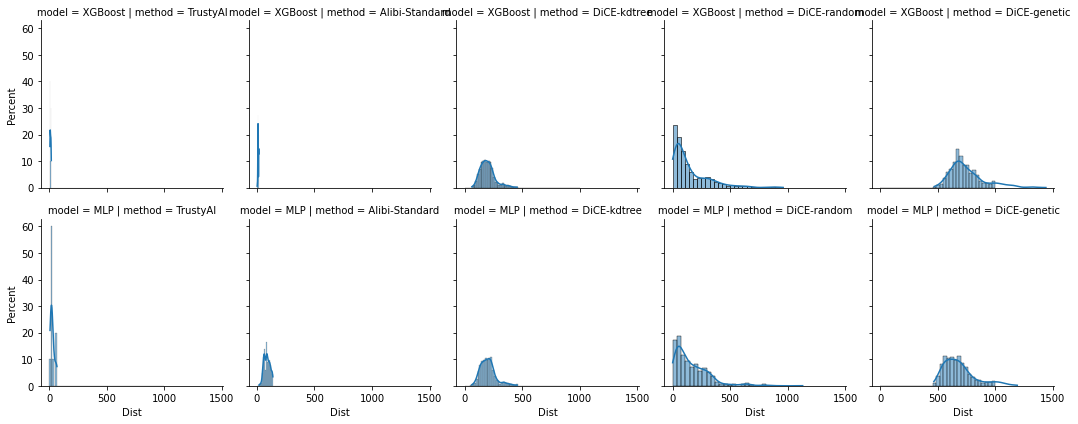

In [51]:
g = sns.FacetGrid(proximity_df, row="model",  col="method")
g.map_dataframe(sns.histplot, x="Dist", stat="percent", binrange=(0, 1000), hue="method", kde=True)

In [52]:
proximity_df[['method', 'model', 'Dist']].groupby(['model', 'method']).agg(["mean", "std"]).T

model                MLP                                                 \
method    Alibi-Standard DiCE-genetic DiCE-kdtree DiCE-random  TrustyAI   
Dist mean      87.158024   686.473577  201.704000   163.68400  29.00000   
     std       25.979938   142.218161   66.671639   148.53296  18.95609   

model            XGBoost                                                  
method    Alibi-Standard DiCE-genetic DiCE-kdtree DiCE-random   TrustyAI  
Dist mean      11.075586   754.902685  198.041000  151.781000  12.400000  
     std        3.162185   157.983707   65.342474  163.108477   3.977716

## Sparsity

In [63]:
proximity_df['Sparsity'] = proximity_df[dist_fields].astype(bool).sum(axis=1)

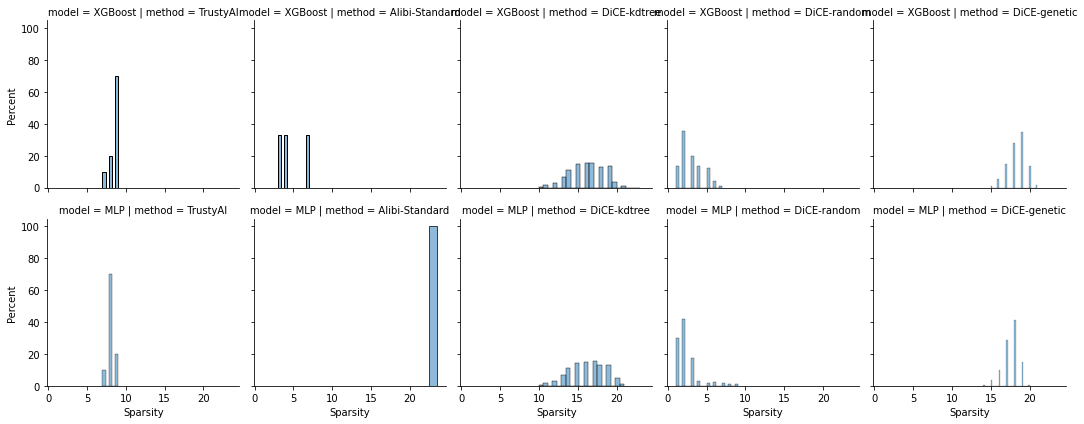

In [66]:
g = sns.FacetGrid(proximity_df, row="model",  col="method")
g.map_dataframe(sns.histplot, x="Sparsity", stat="percent", hue="method")

In [67]:
proximity_df[['method', 'model', 'Sparsity']].groupby(['model', 'method']).agg(["mean", "std"]).T

model                    MLP                                                 \
method        Alibi-Standard DiCE-genetic DiCE-kdtree DiCE-random  TrustyAI   
Sparsity mean           23.0    17.540650    16.26500    2.318000  8.100000   
         std             0.0     1.019831     2.25696    1.556052  0.567646   

model                XGBoost                                                 
method        Alibi-Standard DiCE-genetic DiCE-kdtree DiCE-random  TrustyAI  
Sparsity mean       4.666667    18.371365   16.240000    2.914000  8.600000  
         std        1.702513     1.170134    2.238618    1.439679  0.699206